In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("../data_train_frequency_new.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,Rhythm,Rcount_lead1,RRInterval_mean_lead1,RRInterval_median_lead1,RRInterval_std_lead1,RRInterval_range_lead1,RRInterval_skew_lead1,RRInterval_kurtosis_lead1,R_peaks_amplitude_from_isoelectric_mean_lead1,PRovercount_lead1,...,PRovercount_lead12,medianOfRInterSubMedianOfPInter_lead12,Tcount_lead12,Qcount_lead12,PR_intervals_mean_lead12,PR_intervals_var_lead12,PR_segment_mean_lead12,PR_segment_var_lead12,ST_segment_mean_lead12,ST_segment_var_lead12
0,2,11.0,898.400000,901.0,24.848340,72.0,-0.272513,-1.338262,161.222201,1.0,...,1.000000,-1.0,11.0,10.0,94.444444,1692.246914,-5.800000,1050.760000,128.000000,25.454545
1,1,9.0,1048.750000,1054.0,16.731333,48.0,-0.527204,-1.141916,535.471107,1.0,...,1.000000,9.0,9.0,8.0,86.750000,4560.937500,-34.500000,2496.750000,159.777778,386.172840
2,1,9.0,1058.750000,1064.0,21.492731,62.0,-0.424723,-1.268694,539.209477,1.0,...,0.888889,1.0,9.0,7.0,86.285714,1215.346939,-12.571429,1680.816327,135.333333,891.555556
3,3,18.0,548.235294,550.0,3.208984,10.0,-0.448220,-1.125694,800.711508,1.0,...,1.000000,4.0,13.0,16.0,158.000000,269.000000,84.000000,277.500000,139.692308,667.597633
4,1,8.0,1094.285714,1104.0,36.385689,102.0,-0.364315,-1.177124,499.175352,1.0,...,1.000000,-68.0,8.0,6.0,200.333333,6909.888889,63.000000,7910.333333,119.142857,7444.408163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,1,9.0,1114.000000,1133.0,41.121770,124.0,-0.956470,-0.432652,461.775231,1.0,...,0.700000,191.0,9.0,8.0,223.600000,9733.440000,88.666667,9786.222222,122.000000,294.000000
8512,0,11.0,942.200000,940.0,323.545916,1166.0,1.575627,2.039130,47.162560,1.0,...,0.916667,167.0,12.0,10.0,276.222222,7992.395062,180.666667,5493.333333,187.666667,3377.888889
8513,2,12.0,828.727273,832.0,7.046481,24.0,-0.713989,-0.556833,762.366987,1.0,...,1.000000,6.0,3.0,1.0,164.000000,0.000000,28.000000,0.000000,182.666667,118.222222
8514,1,9.0,1040.750000,1034.0,25.533067,80.0,0.637976,-0.821729,393.076036,1.0,...,1.000000,2.0,9.0,2.0,156.000000,6400.000000,5.000000,3025.000000,140.444444,694.913580


In [3]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("../data_test_frequency_new.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,Rhythm,Rcount_lead1,RRInterval_mean_lead1,RRInterval_median_lead1,RRInterval_std_lead1,RRInterval_range_lead1,RRInterval_skew_lead1,RRInterval_kurtosis_lead1,R_peaks_amplitude_from_isoelectric_mean_lead1,PRovercount_lead1,...,PRovercount_lead12,medianOfRInterSubMedianOfPInter_lead12,Tcount_lead12,Qcount_lead12,PR_intervals_mean_lead12,PR_intervals_var_lead12,PR_segment_mean_lead12,PR_segment_var_lead12,ST_segment_mean_lead12,ST_segment_var_lead12
0,3,21.0,453.100000,443.0,113.667014,384.0,0.408072,-1.010019,93.794110,1.000000,...,0.636364,60.0,2.0,18.0,80.666667,2561.777778,-2.181818,1277.421488,14.000000,1444.000000
1,3,18.0,536.000000,536.0,7.881475,22.0,-0.103811,-1.460399,435.367400,1.000000,...,1.000000,0.0,17.0,13.0,67.384615,1330.698225,-44.923077,1074.224852,71.764706,1131.709343
2,0,17.0,545.000000,522.0,106.402538,392.0,0.494665,-0.589332,437.577682,1.000000,...,0.941176,7.0,7.0,5.0,88.666667,3512.888889,-40.500000,140.750000,44.857143,4076.408163
3,3,29.0,339.642857,339.0,7.579174,22.0,0.016127,-1.517037,962.198974,0.655172,...,0.344828,17.0,1.0,3.0,0.044242,0.044242,0.043021,0.043021,-14.000000,0.000000
4,0,16.0,580.133333,584.0,79.694305,258.0,-0.199141,-1.159748,270.426409,1.000000,...,0.687500,-16.0,12.0,15.0,154.727273,3873.652893,76.909091,1427.173554,76.333333,351.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1,10.0,1011.777778,1004.0,42.493863,138.0,-0.076001,-1.015525,102.541896,1.000000,...,1.000000,-3.0,9.0,9.0,119.111111,5338.765432,-4.666667,3948.444444,268.888889,2381.432099
2126,0,17.0,555.250000,560.0,103.667437,336.0,0.241246,-0.952323,154.002823,1.000000,...,0.937500,-6.0,8.0,7.0,79.428571,2460.244898,-4.571429,891.102041,46.250000,2534.437500
2127,1,12.0,793.818182,602.0,305.346842,782.0,0.161022,-1.790316,345.645608,1.000000,...,1.000000,-17.0,9.0,8.0,60.285714,659.918367,-4.250000,5788.437500,211.777778,582.617284
2128,1,10.0,1027.555556,1034.0,13.259052,38.0,-0.463020,-1.266572,235.897545,1.000000,...,1.000000,2.0,9.0,9.0,185.500000,1227.750000,60.000000,3651.555556,-9.333333,6775.555556


In [6]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [7]:
x_test = scale.transform(x_test)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.3, shuffle=True, stratify=y_train, random_state=10)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (5961, 212)
Vallidation: (2555, 212)


In [9]:
rf_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', n_estimators= 40)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 61)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'uniform')
svc_clf = SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.05,max_depth= 5,min_child_weight= 1,n_estimators= 950)
lr_clf = LogisticRegression(C= 0.14, max_iter= 30, multi_class= 'auto', n_jobs= -1, penalty= 'l2', solver= 'sag', tol= 0.015)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 6,max_features= 'sqrt',splitter= 'best')

In [10]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)
lr_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


LogisticRegression(C=0.14, max_iter=30, n_jobs=-1, solver='sag', tol=0.015)

In [11]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val),
    lr_clf.predict_proba(x_val)
    
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test),
    lr_clf.predict_proba(x_test),
    
))

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0.001,0.01,5),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1,2,3,4],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs':[-1],
    'tol':[0.0001,0.001,0.01]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

In [13]:
result_test = grid_model.predict(X_test_meta)

In [14]:
grid_model.best_params_

{'C': 0.0055000000000000005,
 'max_iter': 3,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.0001}

In [15]:
grid_model.best_score_

0.9600782778864971

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

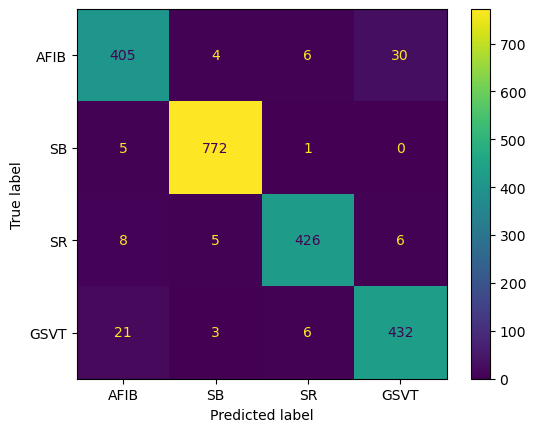

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.965258,0.910112,0.922551,0.916290,0.979822
1,SB,0.991549,0.992288,0.984694,0.988476,0.991124
2,SR,0.984977,0.957303,0.970387,0.963801,0.992285
3,GSVT,0.969014,0.935065,0.923077,0.929032,0.978417
4,macro avg,NaN,0.949400,0.950177,0.948692,NaN
5,micro avg,NaN,0.955399,0.955399,0.955399,NaN
6,weighted avg,NaN,0.955346,0.955357,0.955399,NaN


In [17]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [18]:
# df_evaluation_test.to_csv("./Result/Blending_LR_4_0_3.csv")